# Libraries for Computer Vision
* `torchvision` : Base domain library for PyTorch
* `torchvision.datsets` get data set and data loading for computer vision
* `torchvision.models`: get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms`: function for manipulating your vision data (images) to be suitable for use with ML model.
* `torch.utils.data.Dataset`: Base data set class for Pytorch
* `torch.utils.data.DataLoader`: Creates Python iterable over a Dataset

In [29]:
## Import pytorch

import torch
from torch import nn

#import torch vision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

## import matplotlib for visualization
import matplotlib.pyplot as plt

## Getting a Data set
* Fashion MNIST


In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [31]:
# Setup Trainig data
train_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to(Folder created in the colab)
    train = True, # do we want the training data set
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to trandform the labels / targets
)
# Setup Testing Data

test_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to(Foilder Created in the colab)
    train = False, # do we want the training data set
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to trandform the labels / targets
)


In [32]:
len(train_data), len(test_data)

(60000, 10000)

In [33]:
image , label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### Checking the imageand label shape :
* image.shape -> [color_channel= 1, height = 28, width= 28]

* having color channel = 1 : gray image

In [34]:
#Shape of an image
image.shape

torch.Size([1, 28, 28])

In [35]:
## Lets see the type of classes present
number_of_classes =train_data.classes
number_of_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Visualizing the data


Image Shape: torch.Size([1, 28, 28]) Label: 9


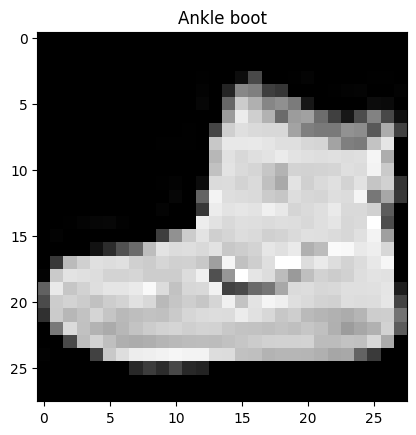

In [36]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape} Label: {label}")
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(number_of_classes[label])
plt.show()

### Randomly look at the data

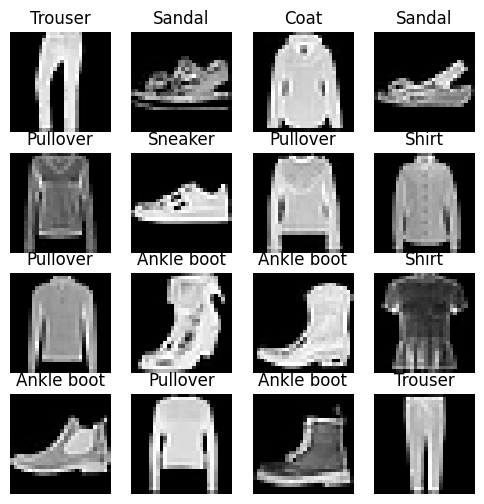

In [37]:
#torch.manual_seed(42)
rows, column = 4, 4
fig = plt.figure(figsize=(6,6))
for i in range(1, rows*column +1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, column, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(number_of_classes[label])
  plt.axis(False)

## Preparing data Loader

* DataLoader makes the entire dta set in to small batches and minibatches
* Turning data into small bathces


In [38]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True
                              )

test_dataloader = DataLoader(dataset = test_data,
                             batch_size= BATCH_SIZE,
                             shuffle = False)

In [39]:
print(f"LEngth of trainDataLoader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of testDataLoader : {len(test_dataloader)} batches of {BATCH_SIZE}")

LEngth of trainDataLoader : 1875 batches of 32
length of testDataLoader : 313 batches of 32


### Checking whast inside the training data loader

In [40]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

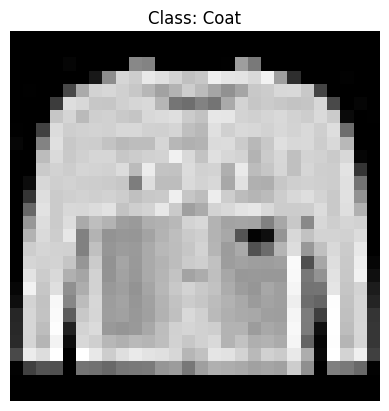

In [41]:
# Random index within the batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

# Select the image and label
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

# Visualize the image
plt.imshow(img.squeeze(), cmap='gray')  # Use .squeeze() for grayscale
plt.title(f"Class: {number_of_classes[label.item()]}")  # Convert label to class name
plt.axis(False)
plt.show()


## model 0: Build a baseline

* Creating a flatten layer

In [42]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
print(x.shape)

# passing the sample to the flatten mpdel

output = flatten_model(x)
print(output.shape)


torch.Size([1, 28, 28])
torch.Size([1, 784])


In [43]:
class modelv0(nn.Module):
  def __init__(self, input_shape: int, hidden_units : int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)

    )

  def forward(self, x):
    return self.layer_stack(x)

In [44]:
torch.manual_seed(42)

model0 = modelv0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape= len(number_of_classes)
).to(device)
model0

modelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setup loss , optimizer and evaluation metrics

* Loss function: since we are working with a multiclass data, our loss function will be `nn.CrossEntropyLoss()`
* optimize = SGD
* Evaluation metric:  accuracy

In [45]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [46]:
from helper_functions import accuracy_fn

# seting up loss function and optimizer
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model0.parameters(), lr = 0.1
                            )

#### Timer to calculate the time


In [47]:
import time

start_time = time.time()  # Record the start time

# code model in between

end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time:.4f} seconds")

Time taken: 0.0000 seconds


### Creating training loop and traing a model on batches of data
* Loop through epochs
* loop through training batches, perform training steps, calculate the training loss "per batch"
* Lopp through testing batches, perform testing steps, calculate the test loss "per batch"
* Print out whats happening


In [51]:
from sklearn.metrics import accuracy_score

# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer

torch.manual_seed(42)
# START the TIMER
start_time = time.time()

epochs = 3

# creating training and test loop.

for epoch in tqdm(range(epochs)):
  print(f'Epochs: {epoch}\n----')

  train_loss = 0
  # Adding a lopp to lopp through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    # enumerate means that we are going batch by batch the batch here is theinder
    # we are having
    model0.train()
    # Foward Pass
    y_pred = model0(X.to(device))

    # Loss calculation
    loss = Loss(y_pred, y.to(device))
    # Convert tensor loss to Python float
    train_loss += loss.item() # accumulating the train loss

    # Optimizer zero grad
    optimizer.zero_grad()

    #Loss baclward
    loss.backward()

    # optmizer step
    optimizer.step()

    # Print out whats hapening
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/ {len(train_dataloader.dataset)} samples.')
  # Divde total train loss with length of the train loader
  train_loss /= len(train_dataloader)

  test_loss, test_acc =0.0,0.0
  model0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # Forward Pass
      test_logit = model0(X_test.to(device))
      test_pred = test_logit.argmax(dim =1) # it will give the labels

      # backward Pass
      t_loss = Loss(test_logit, y_test.to(device))
      test_loss += t_loss.item()

      # calculate the accuracy
      # so we are comparing the labels with labels
      test_acc +=  accuracy_score(y_true = y_test.cpu().numpy(),
                                  y_pred = test_pred.cpu().numpy())*100

    # Calculate the tess loss avg per batch
    test_loss /= len(test_dataloader)
    # calculate the test accuracy per batch
    test_acc /= len(test_dataloader)

  print(f'\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}, Test acc: {test_acc:.2f}')


end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time


print(f"Time taken: {elapsed_time:.4f} seconds")






  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.4764 | Test Loss: 0.4825, Test acc: 83.00
Epochs: 1
----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.4556 | Test Loss: 0.4725, Test acc: 83.63
Epochs: 2
----
Looked at 0/ 60000 samples.
Looked at 12800/ 60000 samples.
Looked at 25600/ 60000 samples.
Looked at 38400/ 60000 samples.
Looked at 51200/ 60000 samples.

Train Loss: 0.4436 | Test Loss: 0.4714, Test acc: 83.58
Time taken: 27.1392 seconds


#### Make prediction and get model0 results

In [53]:
torch.manual_seed(42)

loss_eval, acc_eval = 0.0,0.0
model0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    y_pred = model0(X.to(device))
    loss = Loss(y_pred, y.to(device))
    loss_eval += loss.item()

    acc_eval += accuracy_score(y_true = y.cpu().numpy(),
                               y_pred = y_pred.argmax(dim =1).cpu().numpy())*100

loss_eval /= len(test_dataloader)
acc_eval /= len(test_dataloader)

print(f'Loss: {loss_eval:.4f} | Accuracy: {acc_eval:.2f}')





  0%|          | 0/313 [00:00<?, ?it/s]

Loss: 0.4714 | Accuracy: 83.58


## Model 1: Building a better model with non-Linearity

### importing Librares

In [11]:
#Importing the Libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from sklearn.metrics import accuracy_score
import time

### Data Set Loading

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [13]:
train_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to(Folder created in the colab)
    train = True, # do we want the training data set
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to trandform the labels / targets
)

test_data = datasets.FashionMNIST(
    root = 'data', # Where to download data to(Foilder Created in the colab)
    train = False, # do we want the training data set
    download = True, # do we want to download yes/no
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None # how do we want to trandform the labels / targets
)

### DataLoader Creationg for batch

In [14]:

Batch_size = 32
train_loader = DataLoader(dataset= train_data,
                          shuffle = True,
                          batch_size = Batch_size
                          )

test_loader = DataLoader(dataset = test_data,
                         shuffle = False,
                         batch_size = Batch_size)

### Model V1

In [15]:
class modelv1(nn.Module):
  def __init__(self,
               input_shape,
               hidden_units,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [16]:
output_shape = len(train_data.classes)
output_shape

10

In [17]:
## instances of the model
input_shape = 28*28
hidden_units = 10
output_shape = len(train_data.classes)

model1 = modelv1(input_shape,
                 hidden_units,
                 output_shape).to(device)
model1

modelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
## Loss and Optmizer
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model1.parameters(), lr = 0.1)

### Training and Testing loop

In [19]:
epochs = 3

torch.manual_seed(42)
# START the TIMER
from tqdm.auto import tqdm

start_time = time.time()

for epoch in tqdm(range(epochs)):
  for batch, (X_train,Y_train) in enumerate(train_loader):
    model1.train()
    # Forward Pass
    y_logits = model1(X_train.to(device))
    y_prob = torch.softmax(y_logits, dim =1)
    y_pred = torch.argmax(y_prob, dim = 1)

    # Loss
    loss = Loss(y_logits, Y_train.to(device))
    # accuracy
    acc = accuracy_score(y_true = Y_train.cpu().numpy(),
                         y_pred = y_pred.cpu().numpy() )
    # optimizer zero grad
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    #optmizer step
    optimizer.step()

  # model evaluate

  for _, (X_test, y_test) in enumerate(test_loader):
    model1.eval()
    with torch.inference_mode():
      test_logits = model1(X_test.to(device))
      test_prob = torch.softmax(test_logits, dim = 1)
      test_pred = torch.argmax(test_prob, dim = 1)

      test_loss = Loss(test_logits, y_test.to(device))
      test_acc = accuracy_score(y_true = y_test.cpu().numpy(),
                                y_pred = test_pred.cpu().numpy())

  print(f'Epochs: {epoch}\n----')
  print(f'Train Loss: {loss:.4f} | Train Acc: {acc:.2f}')
  print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}')




end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time


print(f"Time taken: {elapsed_time:.4f} seconds")



  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----
Train Loss: 0.3542 | Train Acc: 0.88
Test Loss: 0.3039 | Test Acc: 0.88
Epochs: 1
----
Train Loss: 0.8667 | Train Acc: 0.62
Test Loss: 0.3053 | Test Acc: 0.94
Epochs: 2
----
Train Loss: 0.3094 | Train Acc: 0.91
Test Loss: 0.3188 | Test Acc: 0.94
Time taken: 36.1863 seconds


#### Functionizing training loop and testing Loop
Let's create a function for
* Trining Loop: `train_step()`
* Testing Loop : `test_step()`

## ModelV2 = CNN

### Importing Libraries

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

import time

from sklearn.metrics import accuracy_score

### DataSet Loading


In [2]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.52MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
## Device Agnostic Code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Preparing DataLoader

In [4]:
Batch_size = 32

train_loader = DataLoader(dataset = train_data,
                          shuffle = True,
                          batch_size = Batch_size)

test_loader = DataLoader(dataset = test_data,
                         shuffle = False,
                         batch_size = Batch_size)

In [5]:
classes = train_data.classes
len(classes)

10

### CNN Model
* Its a 2 Block Model: `Conv1 -> ReLU() -> MaPool` --->> `Conv2 -> ReLU() -> MaPool`
* `input_size= 1`: It defines the number of input channels in the firstt convolution Layer(`nn.Conv2d`).
The Valuse `1` is typically used for the gray scale image that is only one channel.
* `input_size = 3` if the channel is RGB then the input channel will be 3(one for each channel: Red, Green and Blue)

In [6]:
class ModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    # Define the 1st Convolution layer Block
    self.Conv_Block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels= hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    # Defibe the 2nd Convolution layer Block
    self.Conv_Block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, # matchup with the previous layer out channels
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)

    )
    # Define the classifier layer
    self.Classifier = nn.Sequential(
        nn.Flatten(),
        #The in_features argument in the nn.Linear layer should be
        #calculated based on the output shape of the last convolutional block after flattening.
        #Currently, it is set to hidden_units, which is incorrect.
        #You need to calculate the number of features after the last MaxPool2d layer.
        nn.Linear(in_features = hidden_units*0, ## Need to be calculated
                 out_features = output_shape)
    )

  def forward(self, x):
    x = self.Conv_Block_1(x)
    print(x.shape)
    x = self.conv_Block_2(x)
    print(x.shape)
    x = self.Classifier( x)
    return x




## creating the instance for the Model

In [7]:
INPUT_SHAPE = 1
HIDDEN_UNITS =10
OUTPUT_SHAPE = len(classes)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model2 = ModelV2(input_shape =INPUT_SHAPE,
                 hidden_units = HIDDEN_UNITS,
                 output_shape = OUTPUT_SHAPE).to(device)
model2

/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


ModelV2(
  (Conv_Block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Conv_Block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=0, out_features=10, bias=True)
  )
)

### Stepping through `nn.Conv2d`

In [8]:
## Lets create a dummy data
torch.manual_seed(42)
# Create a batch of images
image = torch.randn(32,3,64,64).to(device)
test_image = image[0]
print(image)

tensor([[[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
          [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
          [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
          ...,
          [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
          [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
          [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

         [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
          [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
          [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
          ...,
          [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
          [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
          [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

         [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
          [-1.4647, -1.9571,  

In [9]:
test_image.shape

torch.Size([3, 64, 64])

In [10]:
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size  = 3,
                       stride = 1,
                       padding = 0
                       )
conv_layer

#Pass the data throug the convolution LAyer

output_conv =conv_layer(test_image)
output_conv

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [11]:
output_conv.shape

torch.Size([10, 62, 62])

### stepping `nn.MaxPool2d`

In [12]:
max_pool = nn.MaxPool2d(kernel_size = 2)
output_pool =max_pool(output_conv)
output_pool.shape

torch.Size([10, 31, 31])